# Generate Start Data

In the absense of having data on hand I will have to generate a bunch of fake data.

In [7]:
%matplotlib inline

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import uuid
from control.matlab import *
import os

In [41]:
# Assume engine is a 1st order transfer function with 1s time constant & unity gain.
# "A horse is a sphere if it makes the equations easier"
sys1 = tf([1],[1,1])

In [42]:
def gen_start(T):
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    if crank_duration>12:
        U[(T>crank_time+crank_duration)]=0
        start_type = "no"
    else:
        U[(T>crank_time+crank_duration)]=idle_speed
        start_type = "good"
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout, start_type

In [43]:
def gen_start1(T):
    # No Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    
    U[(T>crank_time+crank_duration)]=0
    start_type = "no"

    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

In [44]:
def gen_start2(T):
    # Good Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

In [ ]:
def gen_start2(T):
    # Good Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

In [51]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

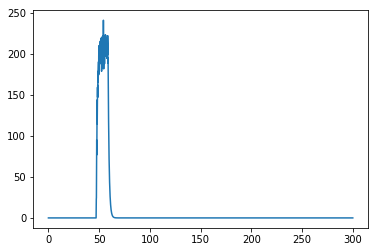

In [24]:
yout = gen_start1(T)
plt.plot(T, yout)

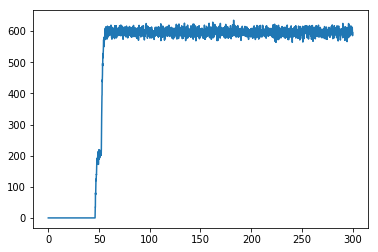

In [27]:
yout = gen_start2(T)
plt.plot(T, yout)

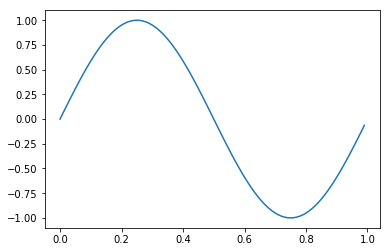

In [39]:
f = 1 # Hz
T=np.arange(0,1,0.01)
plt.plot(T,np.sin(2*np.pi*f*T))

Generate datasets.

In [65]:
def gen_start3(T):
    # Ringing Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    wn = 1
    zeta = .1
    sys2 = tf(wn ** 2, [1, 2*wn*zeta, wn ** 2])
    
    yout, T, xout = lsim(sys2, U=U, T=T)
    
    T2 = crank_time+crank_duration
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

In [67]:
def gen_start4(T):
    # Overshoot Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    wn = 1
    zeta = 0.5
    sys2 = tf(wn ** 2, [1, 2*wn*zeta, wn ** 2])
    
    yout, T, xout = lsim(sys2, U=U, T=T)
    
    T2 = crank_time+crank_duration
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

In [69]:
def gen_start5(T):
    # Overshoot Start.
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed
    
    wn = 1
    zeta = 1.5
    sys2 = tf(wn ** 2, [1, 2*wn*zeta, wn ** 2])
    
    yout, T, xout = lsim(sys2, U=U, T=T)
    
    T2 = crank_time+crank_duration
    
    N = np.random.normal(0, 10, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout

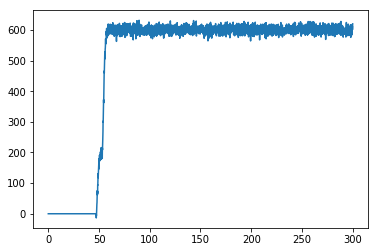

In [70]:
yout = gen_start5(T)
plt.plot(T, yout)

In [53]:
U = np.zeros(T.shape)
crank_time = 10
crank_duration = 15
U[(T>crank_time)]=200
U[(T>crank_time+crank_duration)]=600

yout, T, xout = lsim(sys1, U=U, T=T)

In [57]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

0.10000000000000001

In [64]:
dt = np.mean(np.diff(T))
T2 = np.arange(crank_time+crank_duration, T[-1]+dt, dt)

In [63]:
T2

array([  25. ,   25.1,   25.2, ...,  299.7,  299.8,  299.9])

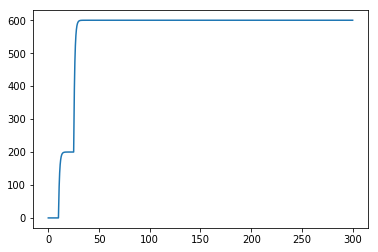

In [54]:
plt.plot(T, yout)

In [9]:
datasets=dict()
datasets["train_test"]=10000
datasets["validation"]=100

for dataset, N in datasets.items():
    for i in range(N):
        fig = plt.figure(figsize=(4,4), dpi=64)

        yout, start_type = gen_start(T)
        fig.clf()
        plt.plot(T,yout)
        plt.axis('off')

        base_dir = os.path.join(dataset, start_type)
        
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)
        
        U =  uuid.uuid4()
        img_name = str(U)+".jpg"
        img_path = os.path.join(base_dir, img_name)
        plt.savefig(img_path, 
                    pad_inches=0.0,
                    dpi='figure')
        plt.close(plt.gcf())